### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Dataset

In [2]:
df = pd.read_csv('/content/udemy_courses_clean.csv')
df.head()

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Practice
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner Pro Financial Analysis Excel 2017
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options


In [3]:
df.columns

Index(['Unnamed: 0', 'course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject',
       'clean_course_title'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           3683 non-null   int64 
 1   course_id            3683 non-null   int64 
 2   course_title         3683 non-null   object
 3   url                  3683 non-null   object
 4   is_paid              3683 non-null   object
 5   price                3683 non-null   object
 6   num_subscribers      3683 non-null   int64 
 7   num_reviews          3683 non-null   int64 
 8   num_lectures         3683 non-null   int64 
 9   level                3683 non-null   object
 10  content_duration     3683 non-null   object
 11  published_timestamp  3683 non-null   object
 12  subject              3683 non-null   object
 13  clean_course_title   3663 non-null   object
dtypes: int64(5), object(9)
memory usage: 403.0+ KB


### Check Nulls

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0


## Start with subject column
### Answer these questions:
##### what is the distribution of the subjects?
##### How many courses per subject?
##### which subject is most popular?


In [6]:
df['subject'].value_counts()

,count
subject,
Web Development,1200
Business Finance,1199
Musical Instruments,681
Graphic Design,603


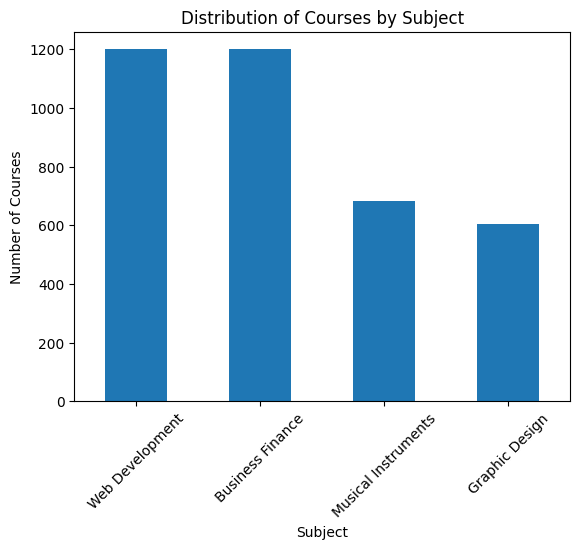

In [7]:
df['subject'].value_counts().plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Number of Courses')
plt.title('Distribution of Courses by Subject')
plt.xticks(rotation=45)
plt.show()

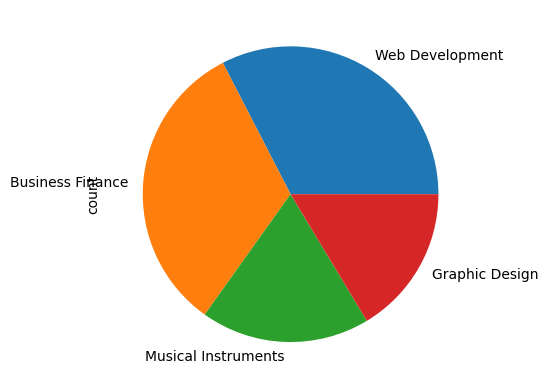

In [8]:
df['subject'].value_counts().plot(kind='pie')
plt.xticks(rotation=45)
plt.show()

##   num_subscribers
### Answer these questions:
###### Number of subscribers per subject ?
###### AVG number of subscribers ?
###### which course have the highest number of subscribers?
##### Number of subscribers per year?


In [9]:
df.groupby('subject')['num_subscribers'].sum()

,num_subscribers
subject,
Business Finance,1870747
Graphic Design,1063148
Musical Instruments,846719
Web Development,7980572


In [10]:
df['num_subscribers'].mean()

3193.3711648112953

In [11]:
df['num_subscribers'].max()

268923

In [12]:
df['num_subscribers'].min()

0

In [13]:
df['num_subscribers'].sum()

11761186

In [14]:
High_sub=df.iloc[df['num_subscribers'].idxmax()]
High_sub

,2832
Unnamed: 0,2832
course_id,41295
course_title,Learn HTML5 Programming From Scratch
url,https://www.udemy.com/learn-html5-programming-...
is_paid,False
price,Free
num_subscribers,268923
num_reviews,8629
num_lectures,45
level,All Levels


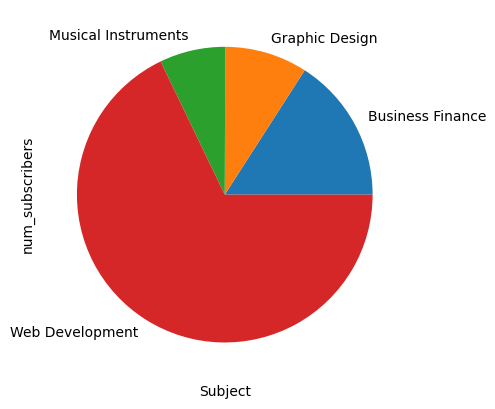

In [15]:
df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')
plt.xlabel('Subject')
plt.xticks(rotation=45)
plt.show()

##   level
### Answer these questions:
##### How many levels do we have ?
##### what i sthe distribution of courses per level ?
##### How many subscribers per level?
#### How many level per subject category?
####which subject have the highest levels?


In [16]:
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

In [17]:
df = df[df["level"] != "52"]

In [18]:
df['level'].value_counts()

,count
level,
All Levels,1932
Beginner Level,1271
Intermediate Level,421
Expert Level,58


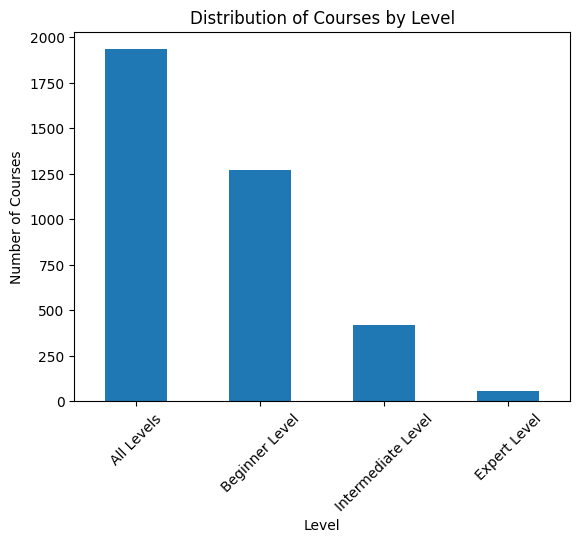

In [19]:
df['level'].value_counts().plot(kind='bar')
plt.xlabel('Level')
plt.ylabel('Number of Courses')
plt.title('Distribution of Courses by Level')
plt.xticks(rotation=45)
plt.show()

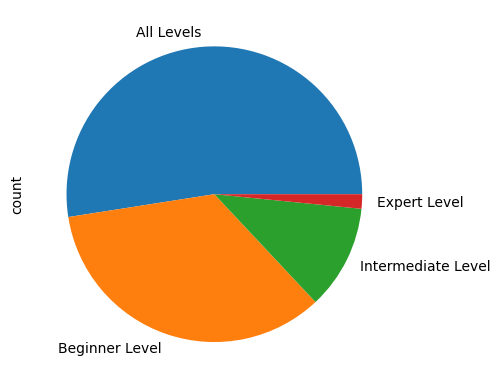

In [20]:
df['level'].value_counts().plot(kind='pie')
plt.xticks(rotation=45)
plt.show()

In [21]:
df.groupby('level')['num_subscribers'].sum()

,num_subscribers
level,
All Levels,6916112
Beginner Level,4052843
Expert Level,50196
Intermediate Level,742005


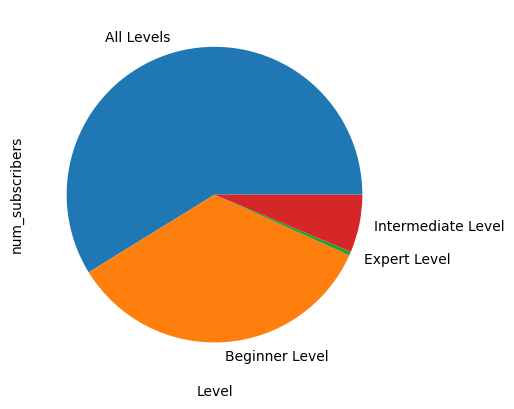

In [22]:
df.groupby('level')['num_subscribers'].sum().plot(kind='pie')
plt.xlabel('Level')
plt.xticks(rotation=45)
plt.show()

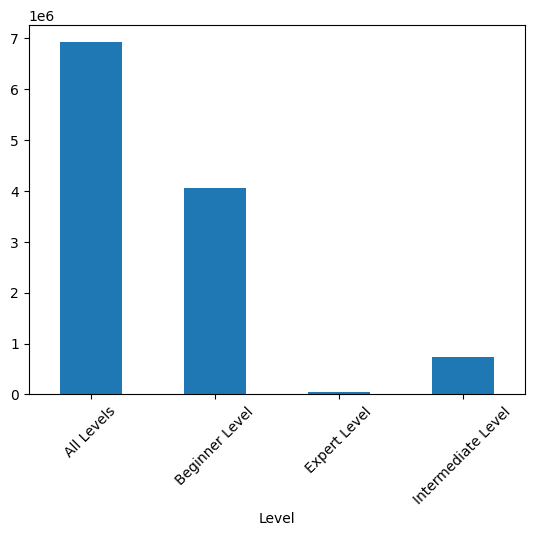

In [23]:
df.groupby('level')['num_subscribers'].sum().plot(kind='bar')
plt.xlabel('Level')
plt.xticks(rotation=45)
plt.show()

In [24]:
df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            699
                     Beginner Level        341
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: count, dtype: int64

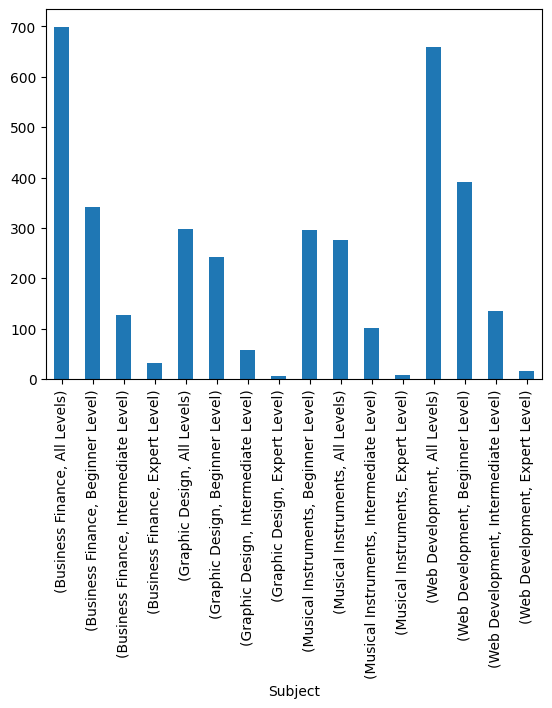

In [25]:
df.groupby('subject')['level'].value_counts().plot(kind='bar')
plt.xlabel('Subject')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Distribution of Courses by Subject and Level')

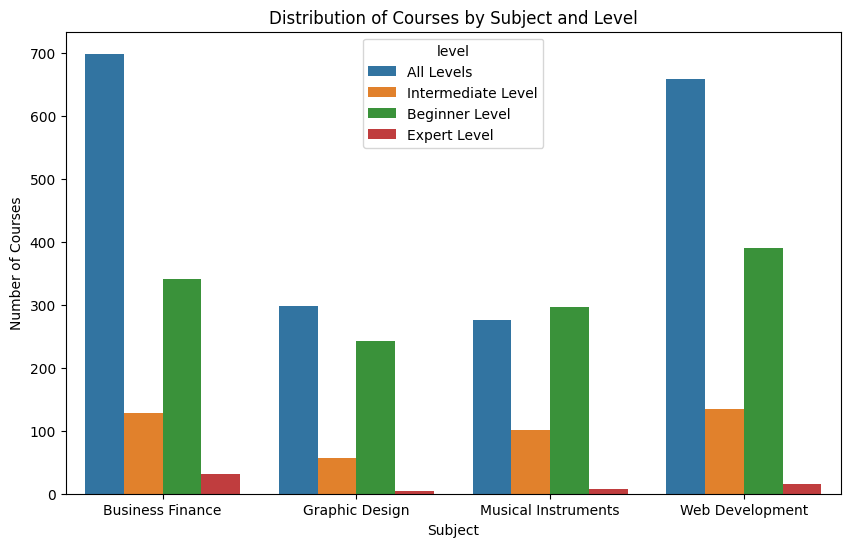

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='subject', hue='level')
plt.xlabel('Subject')
plt.ylabel('Number of Courses')
plt.title('Distribution of Courses by Subject and Level')

## Price column
### Answer these questions:
##### what is the avg price of a courses?
##### What is the min/max price location?
#####How much does udemy earn ?



In [27]:
df['price'].dtype #mix dtype str with num

dtype('O')

In [28]:
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [29]:
df['price']=df['price'].str.replace('Free', '0',regex=True).astype(float)

In [30]:
df['price'].unique()

array([200.,  75.,  45.,  95., 150.,  65., 195.,  30.,  20.,  50., 175.,
       140., 115., 190., 125.,  60., 145., 105., 155., 185., 180., 120.,
        25., 160.,  40.,   0., 100.,  90.,  35.,  80.,  70.,  55., 165.,
       130.,  85., 170., 110., 135.])

In [31]:
df['price'].dtype

dtype('float64')

In [32]:
df['price'].mean()

66.01032047800109

In [33]:
df['price'].max()

200.0

In [34]:
df['price'].min()

0.0

In [35]:
df['price'].idxmax()

0

In [36]:
#get location
df.iloc[df['price'].idxmax()]

,0
Unnamed: 0,0
course_id,1070968
course_title,Ultimate Investment Banking Course
url,https://www.udemy.com/ultimate-investment-bank...
is_paid,True
price,200.0
num_subscribers,2147
num_reviews,23
num_lectures,51
level,All Levels


In [37]:
#profit =price*num_subscribers
df['profit']=df['price']*df['num_subscribers']
df['profit']

,profit
0,429400.0
1,209400.0
2,97830.0
3,232845.0
4,255200.0
...,...
3678,104000.0
3679,7650.0
3680,20520.0
3681,15000.0


In [38]:
property_profit=df['profit'].max()
property_profit

24316800.0

In [39]:
#get location of course with high profit
df['profit'].idxmax()

3235

In [40]:
df.iloc[3234]

,3235
Unnamed: 0,3235
course_id,625204
course_title,The Web Developer Bootcamp
url,https://www.udemy.com/the-web-developer-bootcamp/
is_paid,True
price,200.0
num_subscribers,121584
num_reviews,27445
num_lectures,342
level,All Levels


##   Is_paid column
### Answer these questions:
##### How many courses on udemy are paid or free ?




In [41]:
df['is_paid'].value_counts()

,count
is_paid,
True,2738
TRUE,634
False,264
FALSE,46


In [42]:
paid_dict={'True':True,'TRUE':True,'False':False,'FALSE':False}
df['is_paid']=df['is_paid'].map(paid_dict)

In [43]:
df['is_paid'].value_counts()

,count
is_paid,
True,3372
False,310


Text(0.5, 1.0, 'Distribution of Courses by Paid/Free')

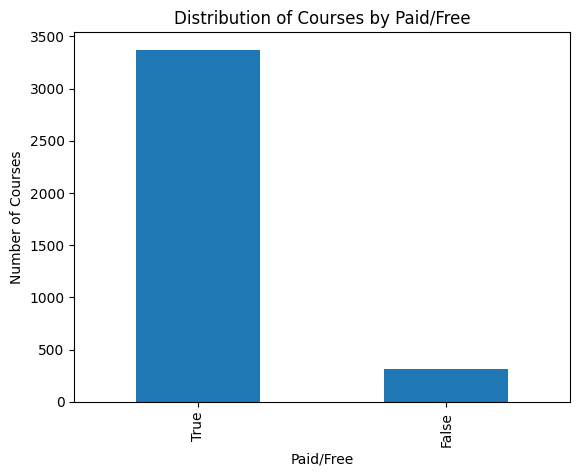

In [44]:
df['is_paid'].value_counts().plot(kind='bar')
plt.xlabel('Paid/Free')
plt.ylabel('Number of Courses')
plt.title('Distribution of Courses by Paid/Free')

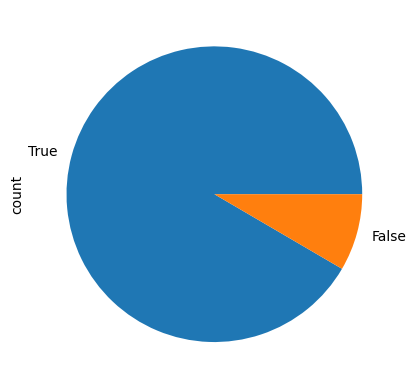

In [45]:
df['is_paid'].value_counts().plot(kind='pie')
plt.xticks(rotation=45)
plt.show()

In [47]:
df.groupby('is_paid')['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     634
         Graphic Design          568
Name: count, dtype: int64

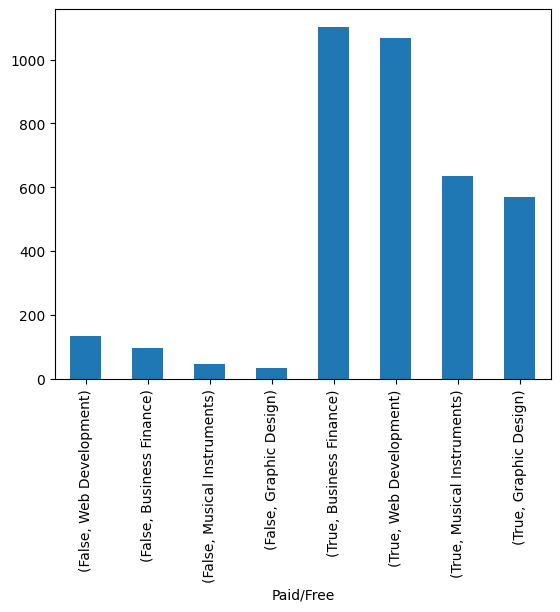

In [49]:
df.groupby('is_paid')['subject'].value_counts().plot(kind='bar')
plt.xlabel('Paid/Free')
plt.xticks(rotation=90)
plt.show()

##   publish_timestamp column
### Answer these questions:
##### Number of subscribers per Year ?
##### year of courses per subject?
##### which course have the highest number of subscribers?
#### Number of subscribers per year?


In [51]:
df['published_timestamp'].dtype

dtype('O')

In [52]:
df['published_timestamp'].str.split('T',expand=True)

,0,1
0,2017-01-18,20:58:58Z
1,2017-03-09,16:34:20Z
2,2016-12-19,19:26:30Z
3,2017-05-30,20:07:24Z
4,2016-12-13,14:57:18Z
...,...,...
3678,2016-06-14,17:36:46Z
3679,2017-03-10,22:24:30Z
3680,2015-12-30,16:41:42Z
3681,2016-08-11,19:06:15Z


In [56]:
df['published-date']=df['published_timestamp'].str.split('T',expand=True).get(0)

In [57]:
df['published-date']

,published-date
0,2017-01-18
1,2017-03-09
2,2016-12-19
3,2017-05-30
4,2016-12-13
...,...
3678,2016-06-14
3679,2017-03-10
3680,2015-12-30
3681,2016-08-11


In [59]:
df['published-date']=pd.to_datetime(df['published-date'],format='%Y-%m-%d')

In [60]:
df['published-date'].dtype

dtype('<M8[ns]')

In [63]:
df['year']=df['published-date'].dt.year
df['year']

,year
0,2017
1,2017
2,2016
3,2017
4,2016
...,...
3678,2016
3679,2017
3680,2015
3681,2016


In [64]:
df['year'].unique()

array([2017, 2016, 2014, 2015, 2013, 2012, 2011], dtype=int32)

In [65]:
df.groupby('year')['num_subscribers'].sum()

,num_subscribers
year,
2011,119028
2012,555339
2013,1723438
2014,1930406
2015,3475324
2016,2966644
2017,990977


Text(0.5, 1.0, 'Number of Subscribers per Year')

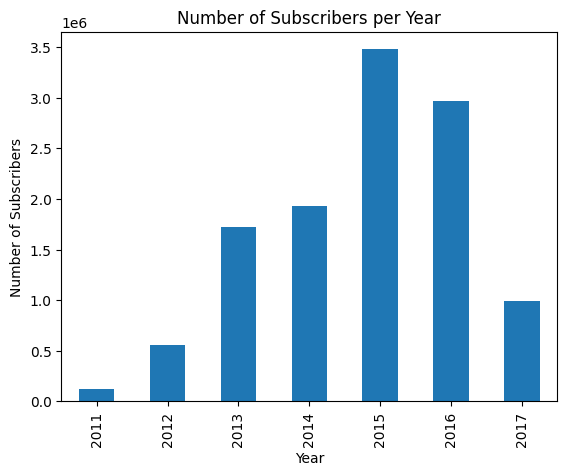

In [66]:
df.groupby('year')['num_subscribers'].sum().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Subscribers')
plt.title('Number of Subscribers per Year')

Text(0, 0.5, 'Number of Courses')

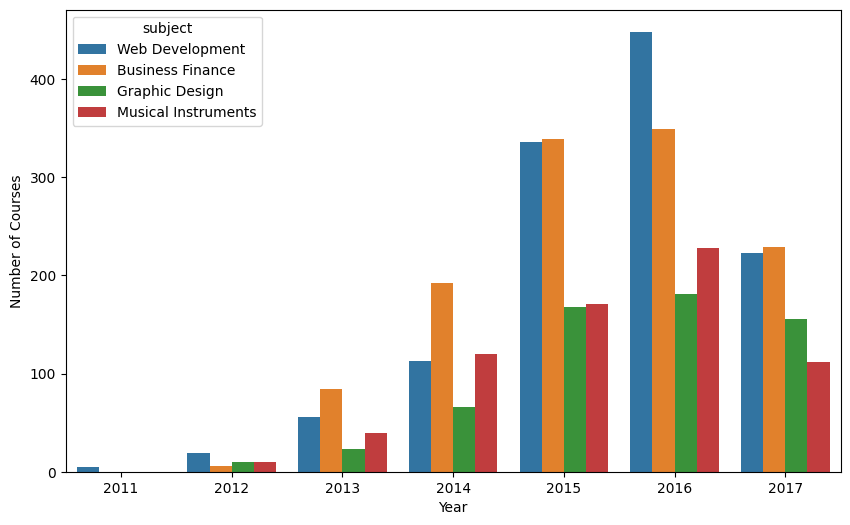

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', hue='subject')
plt.xlabel('Year')
plt.ylabel('Number of Courses')

Text(0, 0.5, 'Number of Courses')

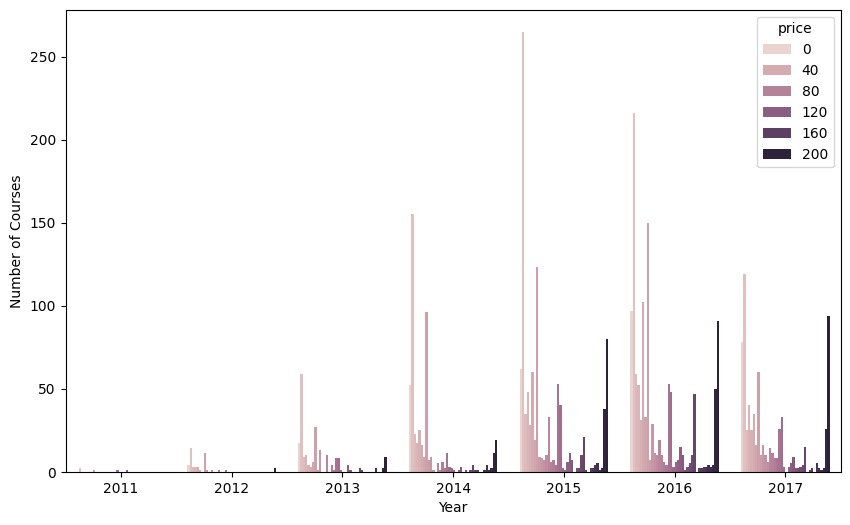

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', hue='price')
plt.xlabel('Year')
plt.ylabel('Number of Courses')